In [1]:
import pandas as pd
import requests, json, time, warnings

warnings.filterwarnings("ignore")

### Loading dataset

In [2]:
addresses = pd.read_csv('USDT addresses.csv')
print(addresses['address'])

0      TPigCYUdrhSoH4Shaog7rDHVSyXTFbR4Zp
1      TQy3NLgRFs79dBaHpDnErdkcDms6yKguRU
2      TRQMRu2Wu45X974TGfZb9KuPb7DRfwnBXz
3      TCv5KURWyNU42JsSoYunvCNsBxnAH9cJVx
4      TRtgn6Po73c9kKAsQw1cStHTqqDo16MLcc
                      ...                
295    TPERNB91tGcUD3rKyG8mCWnQ7GE2jMtmT2
296    TYZBNnXTmE9vddTN15jxGEM3FDmXybD1hS
297    TJreakvu6uzYndRrAFDKQAxsRBZpor7Kjq
298    TBj2FKNizGCtxegndzkdQARrR2un6r5ZVD
299    TT6mAHs59hgAttQBhA7YZvgvwBF3w7aWw3
Name: address, Length: 300, dtype: object


In [3]:
rand_addresses = pd.read_csv('new_random_addresses.csv')
print(rand_addresses['Address'])

0       TNHmkFaRE4cuHq6gG6KbNfzZgNK1PxpsJo
1       TAQEiBrKrGu21TdnFG7fXJTHrYadZJ5Hhd
2       TAN4JXnGSYwZwmShVy5yaVAedn8YTeARVd
3       THBK5HpeiWxN4VbPaH4cxECiPeE7Jj4bXd
4       TJ1ejB77WkGAsXuHawwSZcHk2SUJuMC6ft
                       ...                
3285    TCH1aD5E5RN2LcLziQ6nPcjLA5foyfAc7c
3286    TJ9ijVVasiaR6zNSYpoPkYuKh6n1WwE3Yu
3287    TDMdR7jHvRWXXuRxAiHeGD1mjRd1ujwYSM
3288    THjLwSYKULAsHk8PLBYB896jaZMwtWaZPo
3289    TM9meTexYBRXL5CMZCi67xQLtSaC5MUNTL
Name: Address, Length: 3290, dtype: object


### Rule 1: Small amount

In [4]:
def query_transaction_percentage(address, small_amount_percentage):
    print(address)
    response = requests.get('https://api.trongrid.io/v1/accounts/'+address+'/transactions/trc20?&contract_address=TR7NHqjeKQxGTCi8q8ZY4pL8otSzgjLj6t&limit=200&offset=0')
    if response.status_code != 200:
        return
    transactions = response.json()['data']
    total_transactions_num = 0
    small_transactions_num = 0
    for t in transactions:
        if 'value' in t:
            total_transactions_num += 1
            # print(t['raw_data']['contract'][0]['type'])
            # print(t['raw_data']['contract'][0]['parameter']['value'])
            if float(t['value']) <= 1000000:
                small_transactions_num += 1
    if total_transactions_num > 1:
        small_transactions_percentage = small_transactions_num / total_transactions_num
        small_amount_percentage[address] = small_transactions_percentage
    else:
        small_transactions_percentage = 0
    print(small_transactions_num)
    print(total_transactions_num)
    print(small_transactions_percentage)
    # small_amount_percentage[address] = small_transactions_percentage

In [7]:
small_amount_percentage = {}
for address in addresses['address']:
    query_transaction_percentage(address, small_amount_percentage)
    
# query_transaction_percentage('TCEidZ9vqqiUVYnUofxzEXtQSGUGJAZuDZ', small_amount_percentage)
print(small_amount_percentage)

TPigCYUdrhSoH4Shaog7rDHVSyXTFbR4Zp
75
141
0.5319148936170213
TQy3NLgRFs79dBaHpDnErdkcDms6yKguRU
0
200
0.0
TRQMRu2Wu45X974TGfZb9KuPb7DRfwnBXz
134
200
0.67
TCv5KURWyNU42JsSoYunvCNsBxnAH9cJVx
8
12
0.6666666666666666
TRtgn6Po73c9kKAsQw1cStHTqqDo16MLcc
48
200
0.24
TEH6CK9jQH8uUEiMaxwZBNRaBJ2Mh7PRFN
5
12
0.4166666666666667
TWZbx5sngfi3sqN5Jx1fBtr2xrpMNodxv9
60
200
0.3
TTy5SsTWYs7gamur4TTZ8NmcrXMQsoVxe4
16
200
0.08
TSMC4JHZRVBKoSyQAPqTpzMJfp34jBhjVN
42
118
0.3559322033898305
TAcLwAvxMtRD3kEh8pNfqJDxESERz27T4h
3
14
0.21428571428571427
TEH6CK9jQH8uUEiMaxwZBNRaBJ2Mh7PRFN
5
12
0.4166666666666667
TLm2xZYxHH9d43xiNbQP1MeE2Scae3MrNd
25
46
0.5434782608695652
TXx8thGBWSkaj6sPcYTYX2WkxFoHzXhZxX
35
64
0.546875
THjQWF2WVNKXq73xF4UHfMpzEve6GHyqV
TV8kk1akrGDKVCasgEC5aYrHs5HC93mW9x
81
123
0.6585365853658537
TD1MEu7wYJWoTizozhHbknvVTGShc8xDZT
TKJQM5g8bM6cuMHJ4pJsFZTBPmiyBP4nia
98
200
0.49
TQy3NLgRFs79dBaHpDnErdkcDms6yKguRU
0
200
0.0
TMUJJvuy4V8VSCWd8RxPTCD5RnWtsRe4Se
2
6
0.3333333333333333
TEnef26BTC3AsYinAT

In [8]:
small_amount_percentage_random = {}
for address in rand_addresses['Address']:
    query_transaction_percentage(address, small_amount_percentage_random)
    
# query_transaction_percentage('TCEidZ9vqqiUVYnUofxzEXtQSGUGJAZuDZ', small_amount_percentage)
print(small_amount_percentage_random)

TNHmkFaRE4cuHq6gG6KbNfzZgNK1PxpsJo
1
7
0.14285714285714285
TAQEiBrKrGu21TdnFG7fXJTHrYadZJ5Hhd
1
200
0.005
TAN4JXnGSYwZwmShVy5yaVAedn8YTeARVd
0
200
0.0
THBK5HpeiWxN4VbPaH4cxECiPeE7Jj4bXd
0
200
0.0
TJ1ejB77WkGAsXuHawwSZcHk2SUJuMC6ft
28
28
1.0
TFb3uy2FPZqAtRTkG525op9dNdYf52nrYx
0
200
0.0
TYpCL4GQjWVpZ2c4SiYyy35CB1sVeBooHE
0
200
0.0
TS5QwbzpUcP3KnzuSdgdQ7DmHdCGGBJVCT
3
200
0.015
TSFvf8LZuwy4BKNPdULFD5vaCFMrkiGRme
0
200
0.0
TURsuaTjAmbuCDFT8r8MR9kkBPcF2uUZqD
0
200
0.0
TTVFVJf3Srp4wS76HbGpsG5K54syepKxMo
5
200
0.025
TT9P7ySjBE2mCM6mZERNW6yBoXPWfvHVJU
0
200
0.0
TFbhbSGR55dYbmvVDUnZzjKW1Gjc3qFKTp
0
58
0.0
TJNZvTiiWPoo3f8WaVxjWGq5HVJHwiv3Ee
5
200
0.025
TYV1p1nKRMZ9hCTpApYoLd3Fd9FNxSydv1
2
200
0.01
TZ9yi1vNxDoEmkm1ddywuBVDf7DPLKnx7g
0
30
0.0
TB242BmKBYe2BYZbuDx2pFaQyDqbUgEB1P
200
200
1.0
TFXYZ4zPNuegoKWSSJ8xAbX8LQiHUEP8X5
75
200
0.375
TKmKBmf5LKu7NmvVKrgopHrmtrAKmcRSPs
0
200
0.0
TCCedbMKngRwC6QtF3EWXbiKNEiZZtirA2
1
60
0.016666666666666666
TVKaB4wGiNBqawZxTn95885WhTFCBa3Pu6
0
4
0.0
TG5Qa2jQKUTnFZk

In [9]:
print(len(small_amount_percentage), len(small_amount_percentage_random))

159 3251


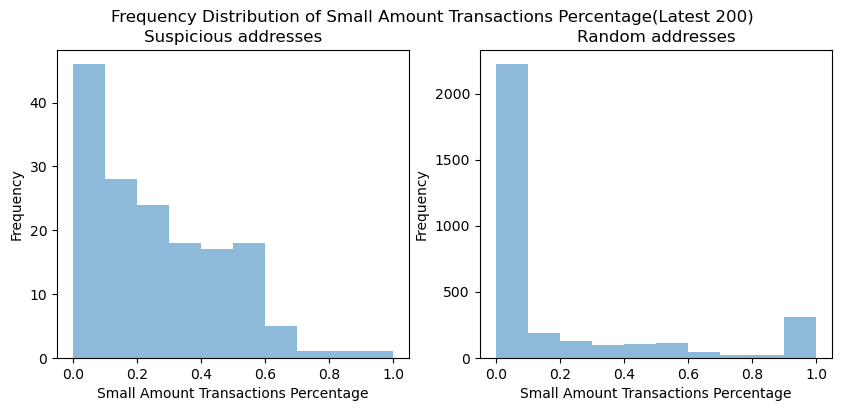

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

values = list(small_amount_percentage.values())
values_random = list(small_amount_percentage_random.values())

#Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10,4))

# Plot the histogram 1
axs[0].hist(values, bins = 10, alpha=0.5)
# sns.kdeplot(values)
axs[0].set_xlabel('Small Amount Transactions Percentage')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Suspicious addresses')

# Plot the histogram 2
axs[1].hist(values_random, bins = 10, alpha=0.5)
# sns.kdeplot(values)
axs[1].set_xlabel('Small Amount Transactions Percentage')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Random addresses')

plt.suptitle('Frequency Distribution of Small Amount Transactions Percentage(Latest 200)')

# Display the plot
plt.show()

### Rule 2: High-value short-period transactions

In [35]:
from datetime import datetime

def convert_time_diff(last_high_value_tx_time, first_high_value_tx_time):
    # Calculate the time difference
    time_diff = last_high_value_tx_time - first_high_value_tx_time

    # Extract the individual components of the time difference
    days = float(time_diff / (3600000*24))
    # minutes = (time_diff.seconds % 3600) // 60
    # seconds = (time_diff.seconds % 3600) % 60

    # Print the real time difference
    return days



In [36]:
from datetime import datetime

def timestamp_to_date(timestamp):
    dt_object = datetime.fromtimestamp(timestamp)
    formatted_date = dt_object.strftime('%Y-%m-%d')
    return formatted_date

In [47]:
def high_value_transaction_timespan(address, large_amount_timespan):
    timestamps = []
    transaction_amounts = []

    response = requests.get('https://api.trongrid.io/v1/accounts/'+address+'/transactions/trc20?&contract_address=TR7NHqjeKQxGTCi8q8ZY4pL8otSzgjLj6t&limit=200&offset=0')
    if response.status_code != 200:
        return
    transactions = response.json()['data']
    first_high_value_tx_time = 0
    last_high_value_tx_time = 0
    count = 0
    for t in transactions:
        if 'value' in t:
            if int(t['value']) >= 3000000000:
                timestamps.append(timestamp_to_date(t['block_timestamp']/1000))
                transaction_amounts.append(int(t['value'])/1000000)

    large_amount_timespan[address] = (timestamps, transaction_amounts)

In [48]:
import random
import copy

temp = copy.deepcopy(addresses['address'])
sampled_addresses = random.sample(sorted(temp), 20)
print(len(sampled_addresses))
large_amount_timespan = {}
for address in sampled_addresses:
    high_value_transaction_timespan(address, large_amount_timespan)
    
# high_value_transaction_timespan('TCEidZ9vqqiUVYnUofxzEXtQSGUGJAZuDZ', large_amount_timespan)
print(large_amount_timespan)

20
{'TG1CA2yN4JKRGEZkbDgJxH1YKhQM1pshJX': (['2023-11-30', '2023-11-29', '2023-11-26', '2023-11-26', '2023-11-26', '2023-11-25', '2023-11-22', '2023-11-21', '2023-11-17', '2023-11-17', '2023-11-13', '2023-11-11', '2023-11-11', '2023-11-10', '2023-11-10', '2023-11-10', '2023-11-10', '2023-11-09', '2023-11-09', '2023-11-09', '2023-11-03', '2023-11-03', '2023-11-01', '2023-10-31', '2023-10-30', '2023-10-28', '2023-10-26', '2023-10-26', '2023-10-26', '2023-10-25', '2023-10-25', '2023-10-17', '2023-10-17', '2023-10-12', '2023-10-12', '2023-10-06', '2023-10-05', '2023-10-05', '2023-10-05', '2023-10-05', '2023-10-04', '2023-10-03', '2023-10-03', '2023-10-03', '2023-10-01', '2023-09-30', '2023-09-29', '2023-09-29', '2023-09-29', '2023-09-29', '2023-09-28', '2023-09-27', '2023-09-27', '2023-09-26', '2023-09-26', '2023-09-25', '2023-09-21', '2023-09-21', '2023-09-21', '2023-09-21', '2023-09-21', '2023-09-21', '2023-09-21', '2023-09-21', '2023-09-20', '2023-09-20', '2023-09-19', '2023-09-19', '202

In [49]:
import copy

temp = copy.deepcopy(rand_addresses['Address'])
sampled_addresses = random.sample(sorted(temp), 16)

large_amount_timespan_random = {}
for address in sampled_addresses:
    high_value_transaction_timespan(address, large_amount_timespan_random)
    
# high_value_transaction_timespan('TCEidZ9vqqiUVYnUofxzEXtQSGUGJAZuDZ', large_amount_timespan)
print(large_amount_timespan_random)

{'TCgDjiEr4tRpPhRDRdkPSWfJiFTLJTRmnE': (['2023-01-14', '2023-01-14', '2023-01-12', '2023-01-12', '2023-01-12', '2023-01-12', '2023-01-12', '2023-01-12', '2023-01-12', '2023-01-12', '2023-01-11', '2023-01-11', '2023-01-11', '2023-01-11', '2023-01-11', '2023-01-11', '2023-01-11', '2023-01-11', '2023-01-11', '2023-01-11', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-09', '2023-01-09', '2023-01-09', '2023-01-09'], [3430.088856, 3430.0, 74048.249502, 14148.028099, 6299.0, 17250.0, 30000.0, 21560.0, 4942.0, 39625.7, 12778.0, 49681.0, 50000.0, 10431.0, 6727.0, 

In [50]:
print(len(large_amount_timespan),len(large_amount_timespan_random))

13 16


In [11]:
import matplotlib.pyplot as plt
import random
import copy

#old one, not used any more
def plot_large_amount(large_amount_timespan):
    # large_amount_timespan_org = copy.deepcopy(large_amount_timespan)
    # sampled_addresses_with_add = random.sample(sorted(large_amount_timespan), 16)
    # print(sampled_addresses_with_add)
    print(large_amount_timespan.keys())
    sampled_addresses = []
    for key, value in large_amount_timespan.items():
        sampled_addresses.append(value)

    ncols = 4
    nrows = 4
    fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(10, 10))
    # Create a figure and axis for the big graph
    # fig, ax = plt.subplots()

    counter = 0
    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i][j]
            if counter < len(sampled_addresses):
                timestamps = sampled_addresses[counter][0]
                transaction_amounts = sampled_addresses[counter][1]
                # ax.hist(df[df.columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(df.columns[counter]))
                x = range(len(timestamps))
                ax.bar(x, transaction_amounts)
                leg = ax.legend(loc='upper left')
                leg.draw_frame(False)
            else:
                ax.set_axis_off()

            counter += 1

    plt.show()

In [44]:
import matplotlib.pyplot as plt
from datetime import datetime
import random
import copy

#old one, not used any more
def plot_large_amount2(large_amount_timespan):
    # large_amount_timespan_org = copy.deepcopy(large_amount_timespan)
    # sampled_addresses_with_add = random.sample(sorted(large_amount_timespan), 16)
    # print(sampled_addresses_with_add)
    print(large_amount_timespan.keys())
    sampled_addresses = []
    for key, value in large_amount_timespan.items():
        sampled_addresses.append(value)

    ncols = 4
    nrows = 4
    fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(15, 10))
    # Create a figure and axis for the big graph
    # fig, ax = plt.subplots()

    counter = 0
    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i][j]
            if counter < len(sampled_addresses):
                timestamps = sampled_addresses[counter][0]
                values = sampled_addresses[counter][1]
                # ax.hist(df[df.columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(df.columns[counter]))
                date_range = [datetime.strptime(ts, '%Y-%m-%d') for ts in timestamps]
                data = {'date_column': date_range, 'value_column': values}
                df = pd.DataFrame(data)
                ax.bar(df['date_column'], df['value_column'])
                ax.set_xticks([])
                leg = ax.legend(loc='upper left')
                leg.draw_frame(False)
            else:
                ax.set_axis_off()

            counter += 1

    plt.show()

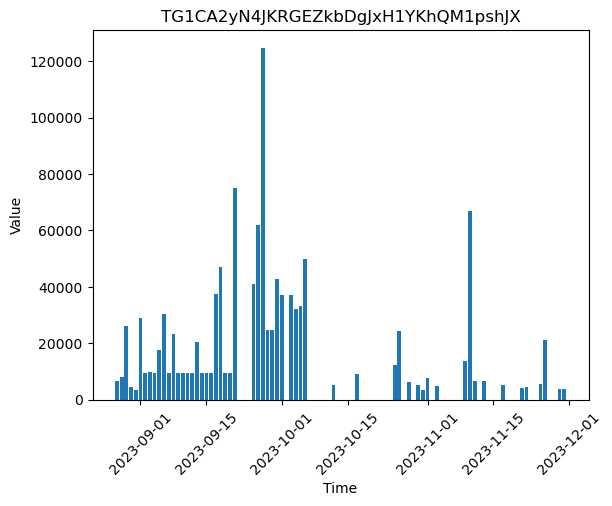

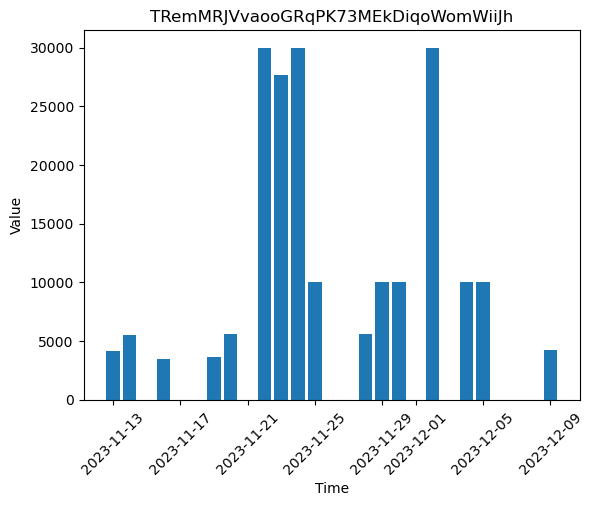

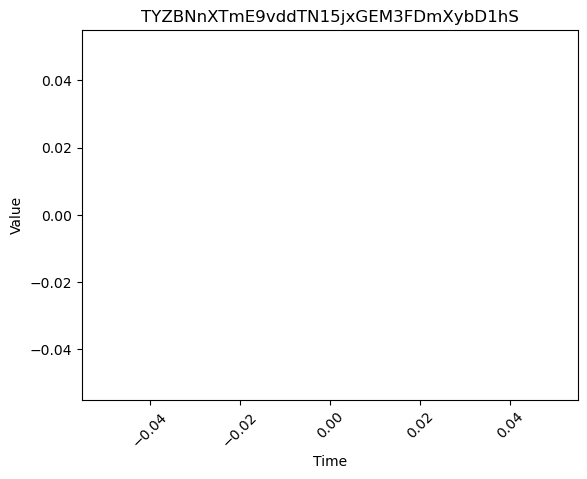

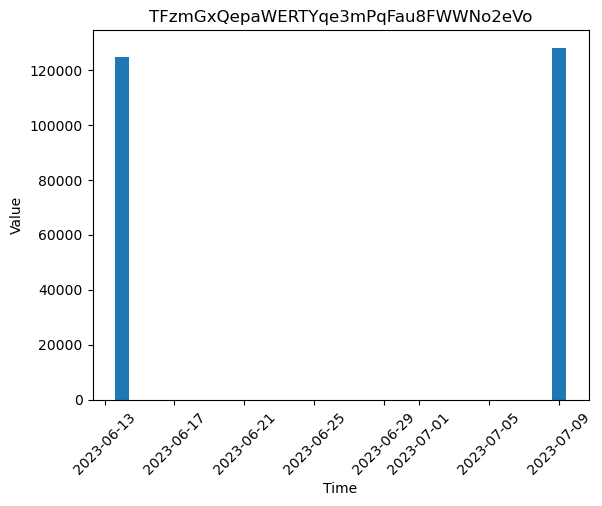

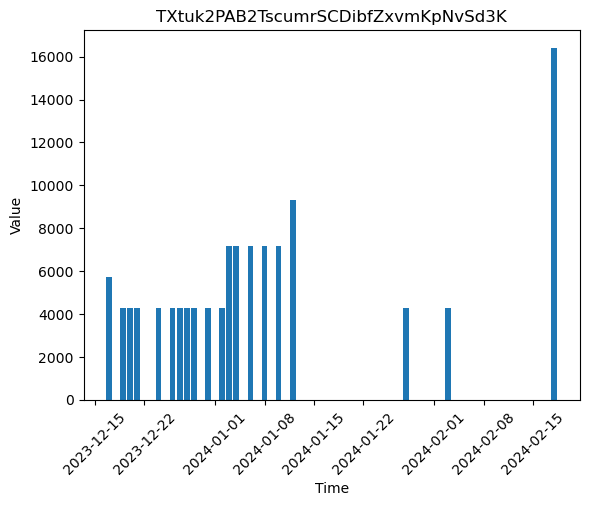

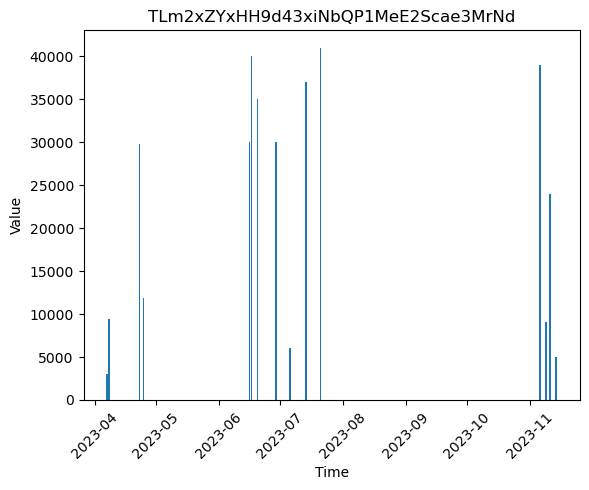

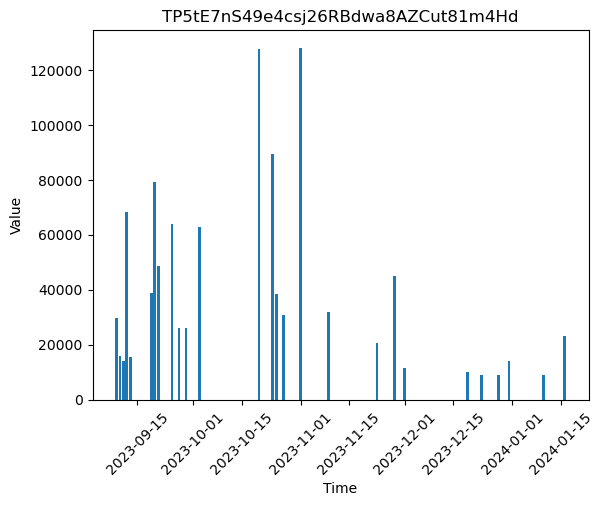

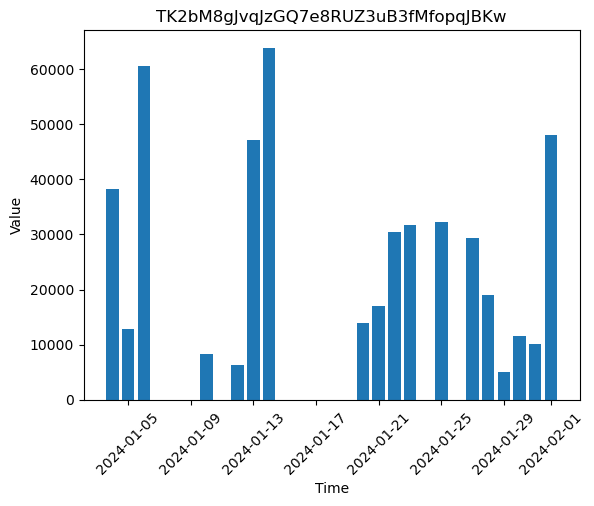

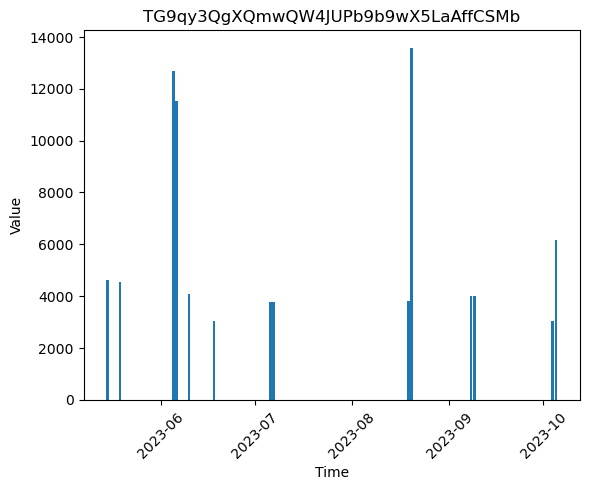

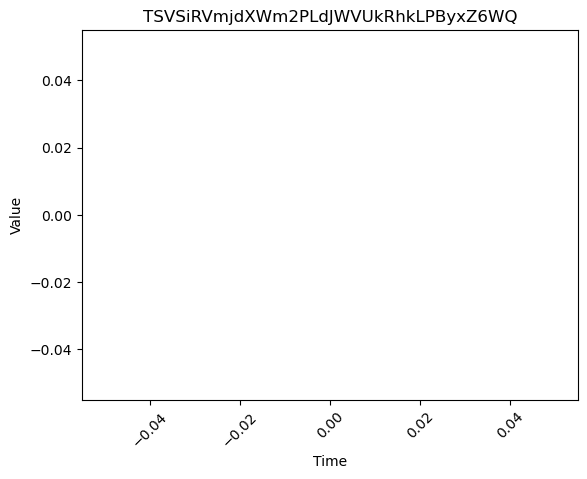

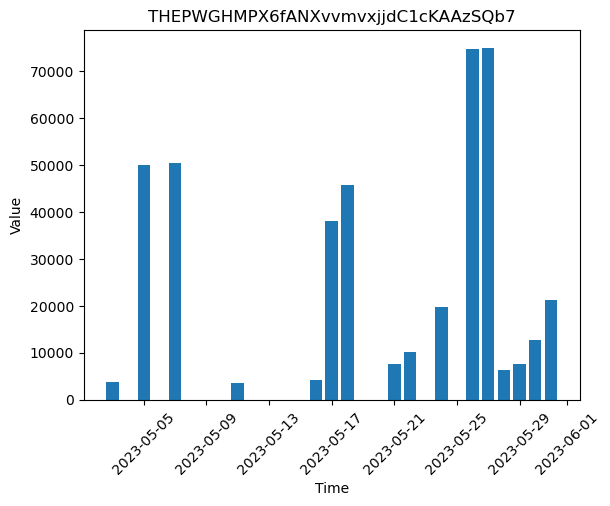

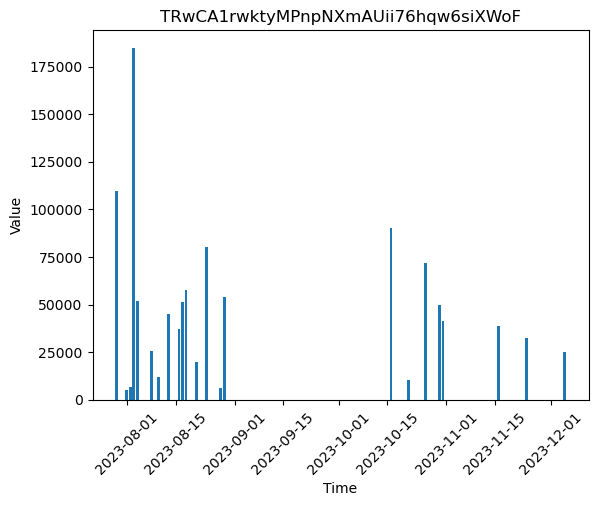

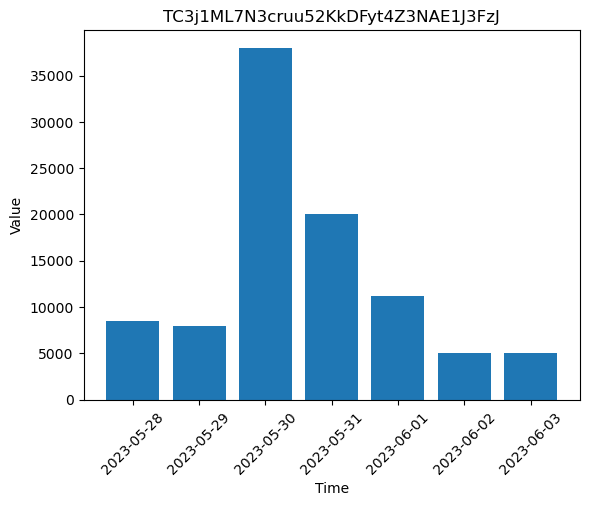

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

sampled_addresses = []
for key, value in large_amount_timespan.items():
    sampled_addresses.append(value)

for i in range(len(sampled_addresses)):
    timestamps = sampled_addresses[i][0]
    date_range = [datetime.strptime(ts, '%Y-%m-%d') for ts in timestamps]
    values = sampled_addresses[i][1]
    data = {'date_column': date_range, 'value_column': values}
    df = pd.DataFrame(data)

    # Create the plot
    plt.bar(df['date_column'], df['value_column'])

    # Add title and axis labels
    plt.title(list(large_amount_timespan.keys())[i])
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()


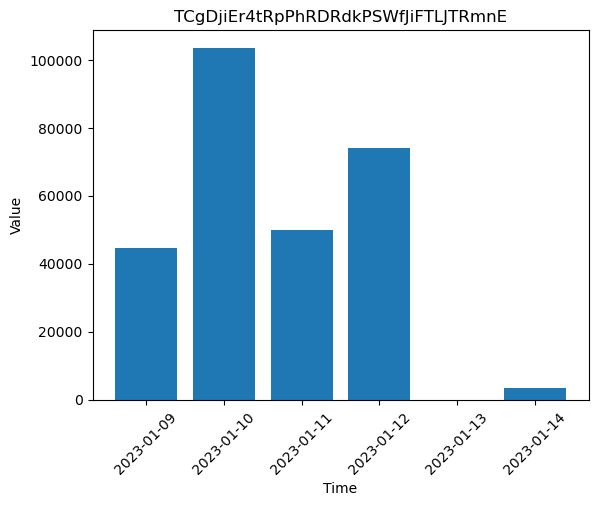

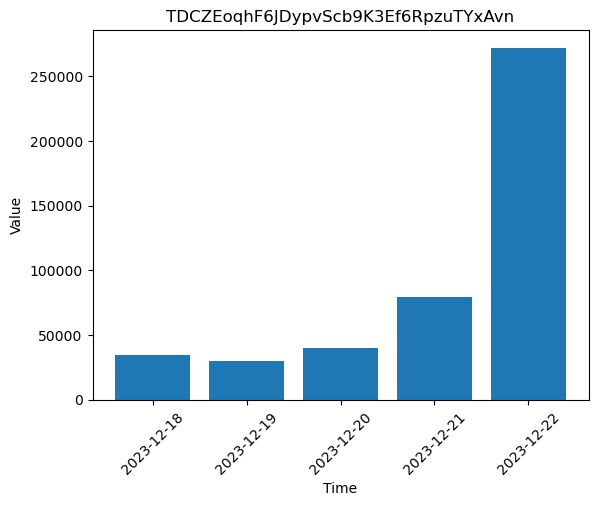

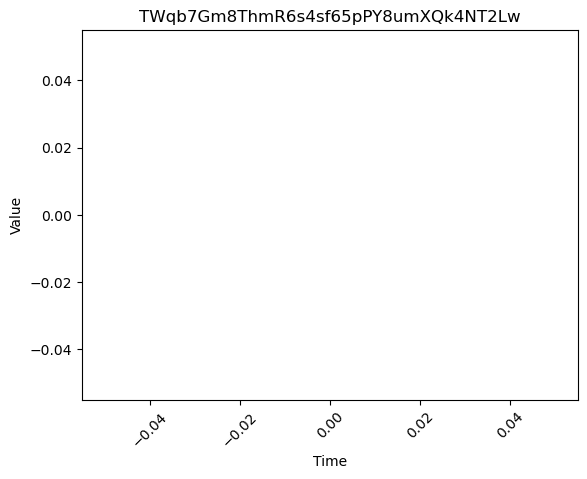

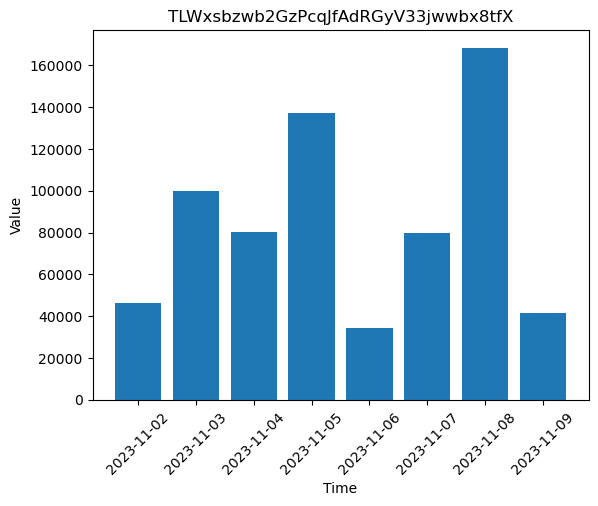

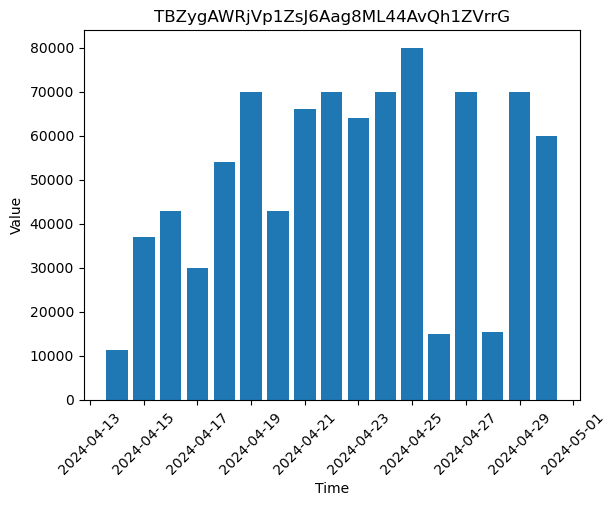

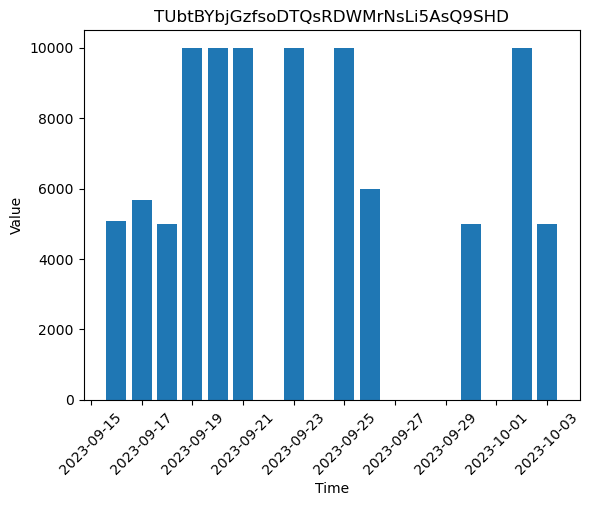

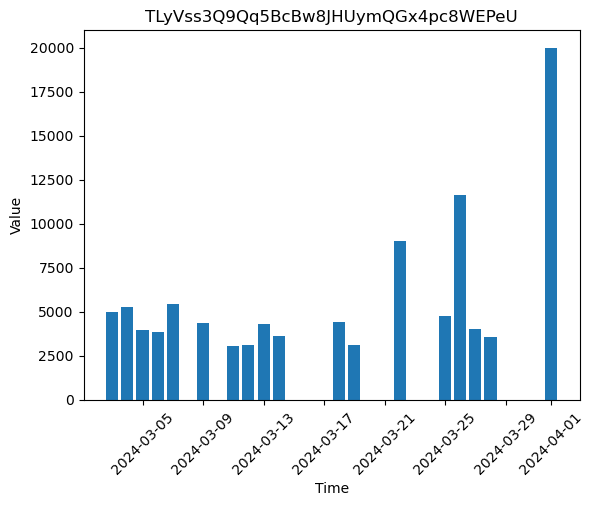

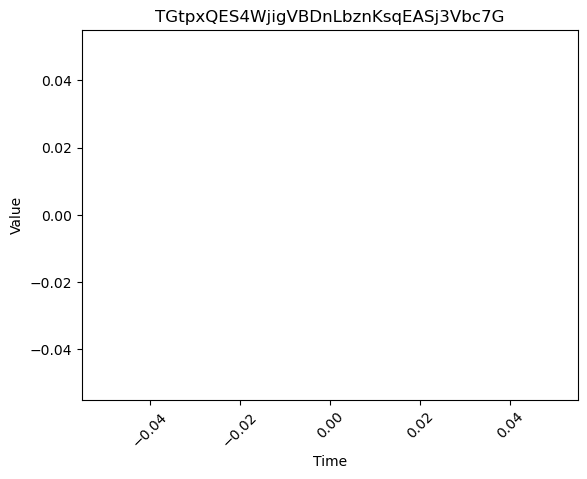

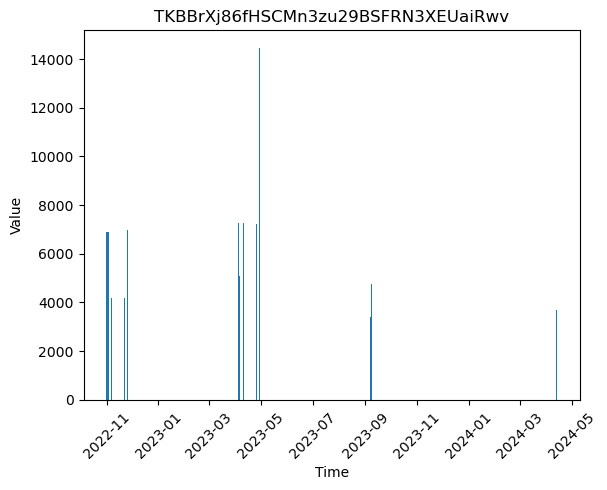

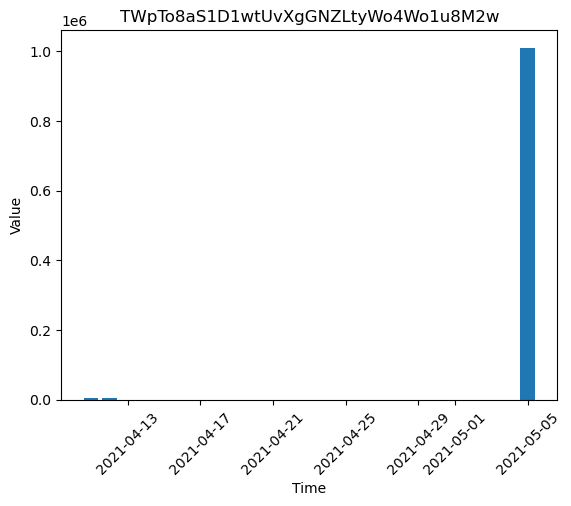

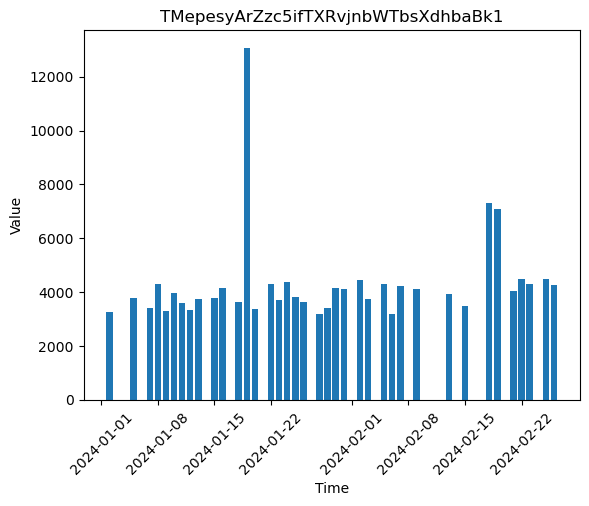

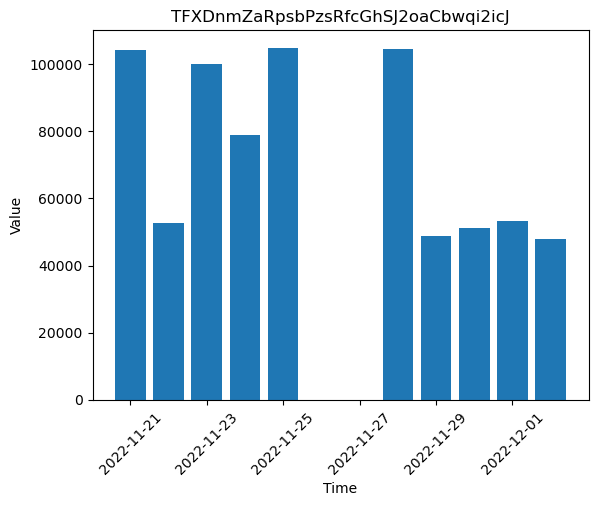

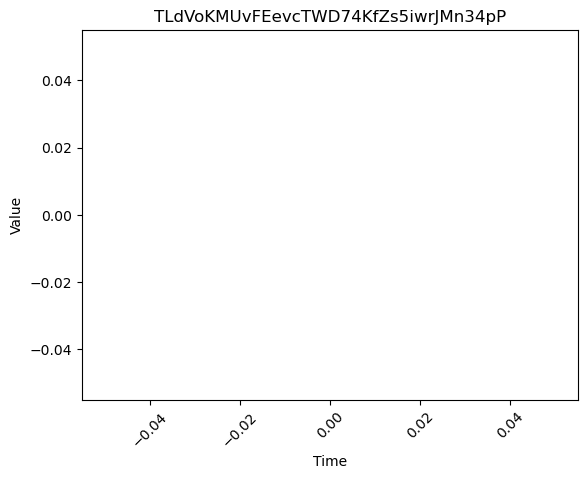

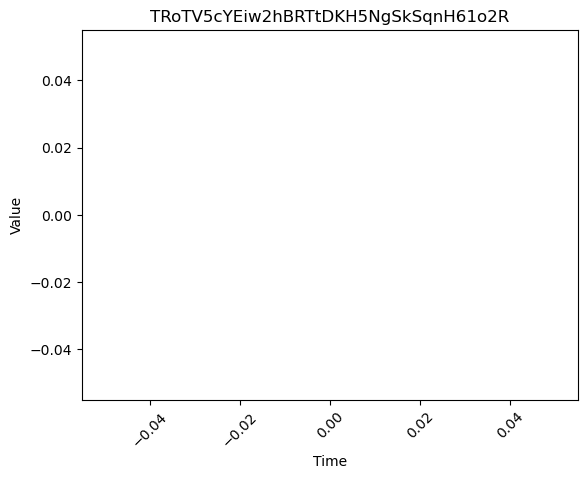

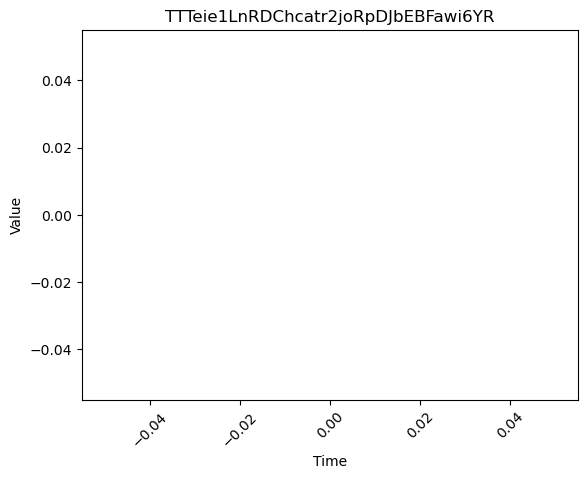

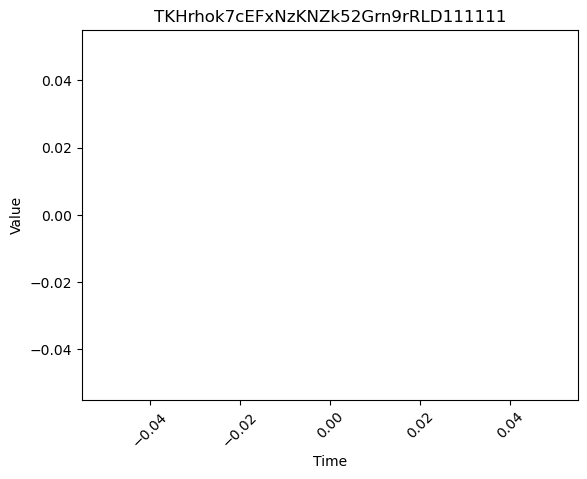

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

sampled_addresses = []
for key, value in large_amount_timespan_random.items():
    sampled_addresses.append(value)

for i in range(len(sampled_addresses)):
    timestamps = sampled_addresses[i][0]
    date_range = [datetime.strptime(ts, '%Y-%m-%d') for ts in timestamps]
    values = sampled_addresses[i][1]
    data = {'date_column': date_range, 'value_column': values}
    df = pd.DataFrame(data)

    # Create the plot
    plt.bar(df['date_column'], df['value_column'])

    # Add title and axis labels
    plt.title(list(large_amount_timespan_random.keys())[i])
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()


dict_keys(['TG1CA2yN4JKRGEZkbDgJxH1YKhQM1pshJX', 'TRemMRJVvaooGRqPK73MEkDiqoWomWiiJh', 'TYZBNnXTmE9vddTN15jxGEM3FDmXybD1hS', 'TFzmGxQepaWERTYqe3mPqFau8FWWNo2eVo', 'TXtuk2PAB2TscumrSCDibfZxvmKpNvSd3K', 'TLm2xZYxHH9d43xiNbQP1MeE2Scae3MrNd', 'TP5tE7nS49e4csj26RBdwa8AZCut81m4Hd', 'TK2bM8gJvqJzGQ7e8RUZ3uB3fMfopqJBKw', 'TG9qy3QgXQmwQW4JUPb9b9wX5LaAffCSMb', 'TSVSiRVmjdXWm2PLdJWVUkRhkLPByxZ6WQ', 'THEPWGHMPX6fANXvvmvxjjdC1cKAAzSQb7', 'TRwCA1rwktyMPnpNXmAUii76hqw6siXWoF', 'TC3j1ML7N3cruu52KkDFyt4Z3NAE1J3FzJ'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

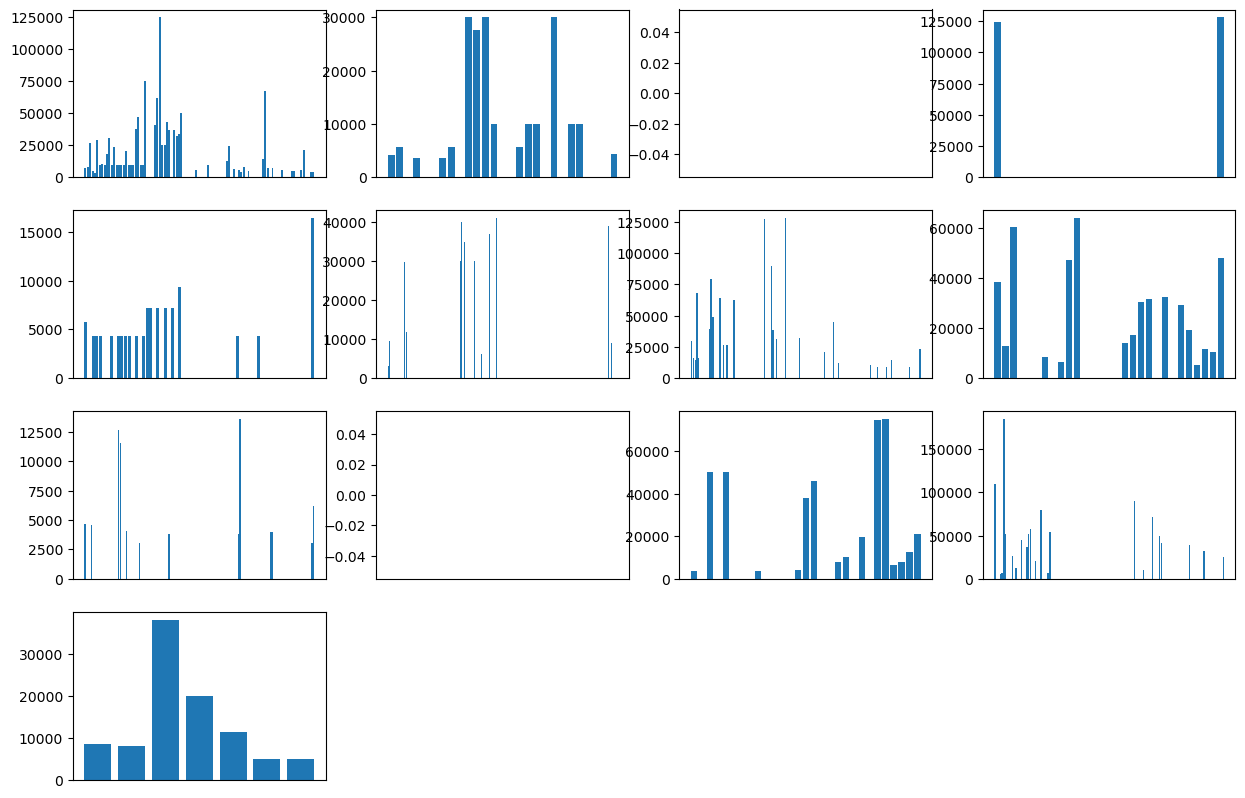

In [51]:
plot_large_amount2(large_amount_timespan)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['TCgDjiEr4tRpPhRDRdkPSWfJiFTLJTRmnE', 'TDCZEoqhF6JDypvScb9K3Ef6RpzuTYxAvn', 'TWqb7Gm8ThmR6s4sf65pPY8umXQk4NT2Lw', 'TLWxsbzwb2GzPcqJfAdRGyV33jwwbx8tfX', 'TBZygAWRjVp1ZsJ6Aag8ML44AvQh1ZVrrG', 'TUbtBYbjGzfsoDTQsRDWMrNsLi5AsQ9SHD', 'TLyVss3Q9Qq5BcBw8JHUymQGx4pc8WEPeU', 'TGtpxQES4WjigVBDnLbznKsqEASj3Vbc7G', 'TKBBrXj86fHSCMn3zu29BSFRN3XEUaiRwv', 'TWpTo8aS1D1wtUvXgGNZLtyWo4Wo1u8M2w', 'TMepesyArZzc5ifTXRvjnbWTbsXdhbaBk1', 'TFXDnmZaRpsbPzsRfcGhSJ2oaCbwqi2icJ', 'TLdVoKMUvFEevcTWD74KfZs5iwrJMn34pP', 'TRoTV5cYEiw2hBRTtDKH5NgSkSqnH61o2R', 'TTTeie1LnRDChcatr2joRpDJbEBFawi6YR', 'TKHrhok7cEFxNzKNZk52Grn9rRLD111111'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

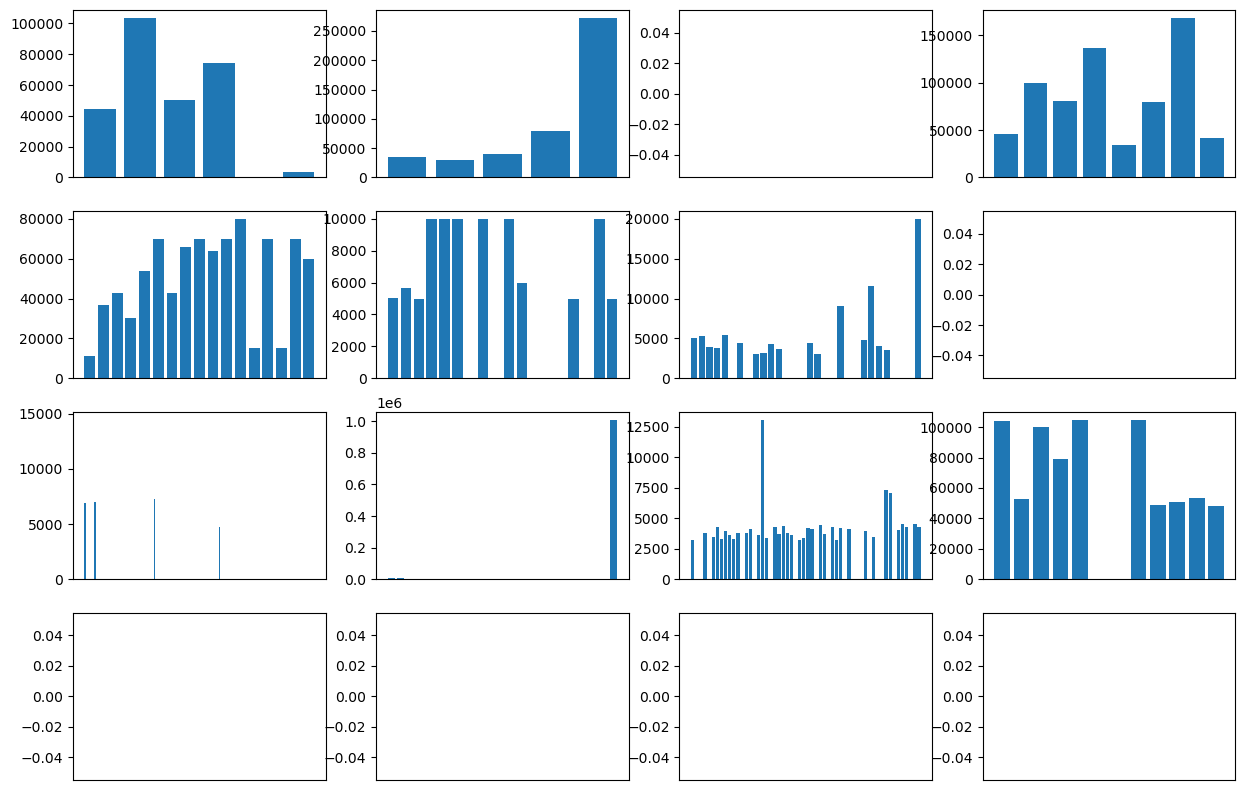

In [52]:
plot_large_amount2(large_amount_timespan_random)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

values = list(large_amount_timespan.values())
filtered_values = [value for value in values if value < 17500]

# Plot the histogram
plt.hist(filtered_values, alpha=0.5)
# sns.kdeplot(values)

# Add labels and title
plt.xlabel('Time Span between First and Last Large Transaction(Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Large Amount Transactions Timespan')

# Display the plot
plt.show()

### Another way to estimate Rule 2(not used any more)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

values = list(large_amount_timespan.values())
values_random = list(large_amount_timespan_random.values())
filtered_values = [value for value in values if value < 17500]
filtered_values_random = [value for value in values_random if value < 500]

#Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10,4))

# Plot the histogram 1
axs[0].hist(filtered_values, alpha=0.5)
# sns.kdeplot(values)
axs[0].set_xlabel('Time Span between First and Last Large Transaction(Days)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Suspicious addresses')

# Plot the histogram 2
axs[1].hist(filtered_values_random, alpha=0.5)
# sns.kdeplot(values)
axs[1].set_xlabel('Time Span between First and Last Large Transaction(Days)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Random addresses')

plt.suptitle('Frequency Distribution of Large Transactions Time Span(Latest 200)')

# Display the plot
plt.show()

In [119]:
def high_value_transaction_daily_counts(address, large_amount_timespan):
    print(address)
    transation_counts = {}

    response = requests.get('https://api.trongrid.io/v1/accounts/'+address+'/transactions/trc20?&contract_address=TR7NHqjeKQxGTCi8q8ZY4pL8otSzgjLj6t&limit=200&offset=0')
    if response.status_code != 200:
        return
    transactions = response.json()['data']
    first_high_value_tx_time = 0
    last_high_value_tx_time = 0
    count = 0
    for t in transactions:
        if 'value' in t:
            if float(t['value']) >= 3000000000:
                time = timestamp_to_date(t['block_timestamp']/1000)
                if time in transation_counts:
                    transation_counts[time] += 1
                else:
                    transation_counts[time] = 1

    large_amount_timespan[address] = transation_counts

In [120]:
import random
import copy

temp = copy.deepcopy(addresses['address'])
sampled_addresses = random.sample(sorted(temp), 20)
large_amount_timespan = {}
for address in sampled_addresses:
    high_value_transaction_daily_counts(address, large_amount_timespan)
    
# high_value_transaction_timespan('TCEidZ9vqqiUVYnUofxzEXtQSGUGJAZuDZ', large_amount_timespan)
print(large_amount_timespan)

TJeFqUCU7fQMn8tr96hUpFXcn7rXU2NWsJ
1688487360.0
1688486586.0
1688454432.0
1688444529.0
1688140344.0
1688125491.0
1688106936.0
1688105190.0
1688101434.0
1687962645.0
1687934763.0
1687879332.0
1687867608.0
1687843482.0
1687842714.0
1687538121.0
1687534806.0
1687522446.0
1687504095.0
1687451958.0
1687442151.0
1687438932.0
1687278165.0
1687269960.0
1687263561.0
1687245324.0
1687191000.0
1687187538.0
1687184196.0
1687104369.0
1687098066.0
1687093944.0
1687091475.0
1687018854.0
1687007895.0
1686931038.0
1686924912.0
1686759996.0
1686743865.0
1686729540.0
1686662112.0
1686661077.0
1686638721.0
1686589011.0
1686576627.0
1686500118.0
1686495549.0
1686486330.0
1686411843.0
1686388284.0
1686387336.0
1686372309.0
1686328515.0
1686323445.0
1686315642.0
1686155217.0
1686115239.0
1686061809.0
1686061380.0
1685979645.0
1685968758.0
1685946216.0
1685894262.0
1685872515.0
1685865963.0
1685724870.0
1685707536.0
1685692947.0
1685462352.0
1685451198.0
1685375979.0
1685368518.0
1685363715.0
1685204292.0
168

In [126]:
import copy

temp = copy.deepcopy(rand_addresses['Address'])
sampled_addresses = random.sample(sorted(temp), 16)

large_amount_timespan_random = {}
for address in sampled_addresses:
    high_value_transaction_daily_counts(address, large_amount_timespan_random)
    
# high_value_transaction_timespan('TCEidZ9vqqiUVYnUofxzEXtQSGUGJAZuDZ', large_amount_timespan)
print(large_amount_timespan_random)

TWnHUYCzYD1GnkKBQB78RNdE7UfXMshcwW
TUm9hCTY7RG9aqr4MZ187DsXf5WTQYgLzA
1704076893.0


AttributeError: module 'datetime' has no attribute 'fromtimestamp'

In [122]:
import matplotlib.pyplot as plt
import datetime
import random
import copy

def plot_large_amount2(large_amount_timespan):
    # large_amount_timespan_org = copy.deepcopy(large_amount_timespan)
    # sampled_addresses_with_add = random.sample(sorted(large_amount_timespan), 16)
    # print(sampled_addresses_with_add)
    print(large_amount_timespan.keys())
    sampled_addresses = []
    for key, value in large_amount_timespan.items():
        sampled_addresses.append(value)

    ncols = 4
    nrows = 4
    fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(10, 10))
    # Create a figure and axis for the big graph
    # fig, ax = plt.subplots()

    counter = 0
    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i][j]
            if counter < len(sampled_addresses):
                timestamps = [key for key, value in sampled_addresses[counter].items()]
                transaction_counts = [value for key, value in sampled_addresses[counter].items()]
                # ax.hist(df[df.columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(df.columns[counter]))
                formatted_timestamps = [datetime.datetime.strptime(ts, '%Y-%m-%d') for ts in timestamps]
                ax.bar(formatted_timestamps, transaction_counts)
                # ax.set_xticks(formatted_timestamps, timestamps, rotation=45)
                # ax.set_xlabel('x')
                # ax.set_ylabel('PDF')
                # Set x-axis tick labels
                # ax.set_xticks(x, timestamps, rotation=45)
                ax.set_xticks([])
                # ax.set_ylim([0, 5])
                leg = ax.legend(loc='upper left')
                leg.draw_frame(False)
            else:
                ax.set_axis_off()

            counter += 1

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['TJeFqUCU7fQMn8tr96hUpFXcn7rXU2NWsJ', 'TGEE8DBz6BnPYPxRUNv42frvCE2aAHZN1c', 'TRzKj5d8Mk3LVEbLrEey7myHy59cSpW9A5', 'TQy3NLgRFs79dBaHpDnErdkcDms6yKguRU', 'TCBauiRGKPHAyXHbQHNFTq9FMHN9WscGJn', 'TQaUks22W7BVAHveyQfREmTyoHgJhkKy6S', 'TRwCA1rwktyMPnpNXmAUii76hqw6siXWoF', 'TQdQ4hk6R6iaxCqveyzm3VPCEw1PtWwffq', 'TQ43D6fiBQpALjcCAPwRqVuVvTJGVzBUvL', 'TRx7MHcnVhtEBTmPktq38jb1noGsMYune7', 'TAndmHRhSqxW5rBHZyXZsY8MQUe3WUBqNK', 'TR8yChhSphqLw2oisbQQtRVMFE1wD83Zq6', 'TFbkf4GMt3L4hwcRzDDtHrrn87Zbeoi2JM', 'TXx8thGBWSkaj6sPcYTYX2WkxFoHzXhZxX', 'TFQ42kUgv13yEx3P4FS9L65DpyQtgBLvHc', 'TVHxSgZvoDjibTepekU3VYuwVMJZv1zbi7'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

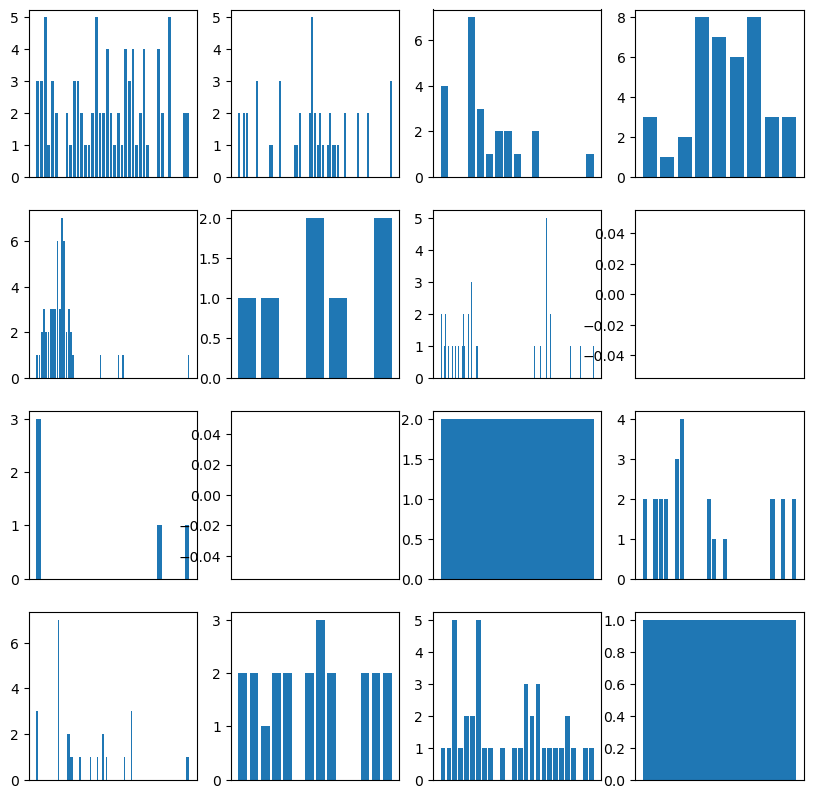

In [123]:
plot_large_amount2(large_amount_timespan)

### Rule 3: Immediate withdraw

In [58]:
def immediate_withdraw_count(address, immediate_withdraw_counts):
    print(address)
    response = requests.get('https://api.trongrid.io/v1/accounts/'+address+'/transactions/trc20?&contract_address=TR7NHqjeKQxGTCi8q8ZY4pL8otSzgjLj6t&limit=200&offset=0')
    if response.status_code != 200:
        return
    transactions = response.json()['data']
    count = 0
    last_tx_value = 0
    last_tx_time = 0
    tx_index = 0
    for t in transactions:
        if 'from' in t and 'value' in t and 'to' in t:
            if t['from'] == address and float(t['value']) >= 1000000000:
                last_tx_value = float(t['value'])
                last_tx_time = tx_index
            elif t['to'] == address and float(t['value']) >= 1000000000:
                if abs(float(t['value'])-last_tx_value) < 2000000 and tx_index-last_tx_time < 3:
                    count += 1
                    last_tx_value = 0
        tx_index += 1
    
    print(count)
    immediate_withdraw_counts[address] = count
    

In [59]:
immediate_withdraw_counts = {}
for address in addresses['address']:
    immediate_withdraw_count(address, immediate_withdraw_counts)
    
# immediate_withdraw_count('TCEidZ9vqqiUVYnUofxzEXtQSGUGJAZuDZ', large_amount_timespan)
print(immediate_withdraw_counts)

TPigCYUdrhSoH4Shaog7rDHVSyXTFbR4Zp
14
TQy3NLgRFs79dBaHpDnErdkcDms6yKguRU
0
TRQMRu2Wu45X974TGfZb9KuPb7DRfwnBXz
0
TCv5KURWyNU42JsSoYunvCNsBxnAH9cJVx
0
TRtgn6Po73c9kKAsQw1cStHTqqDo16MLcc
0
TEH6CK9jQH8uUEiMaxwZBNRaBJ2Mh7PRFN
2
TWZbx5sngfi3sqN5Jx1fBtr2xrpMNodxv9
2
TTy5SsTWYs7gamur4TTZ8NmcrXMQsoVxe4
2
TSMC4JHZRVBKoSyQAPqTpzMJfp34jBhjVN
0
TAcLwAvxMtRD3kEh8pNfqJDxESERz27T4h
1
TEH6CK9jQH8uUEiMaxwZBNRaBJ2Mh7PRFN
2
TLm2xZYxHH9d43xiNbQP1MeE2Scae3MrNd
1
TXx8thGBWSkaj6sPcYTYX2WkxFoHzXhZxX
6
THjQWF2WVNKXq73xF4UHfMpzEve6GHyqV
TV8kk1akrGDKVCasgEC5aYrHs5HC93mW9x
1
TD1MEu7wYJWoTizozhHbknvVTGShc8xDZT
TKJQM5g8bM6cuMHJ4pJsFZTBPmiyBP4nia
0
TQy3NLgRFs79dBaHpDnErdkcDms6yKguRU
0
TMUJJvuy4V8VSCWd8RxPTCD5RnWtsRe4Se
0
TEnef26BTC3AsYinAToCg5w2HDM6dX4ws9
3
TKJQM5g8bM6cuMHJ4pJsFZTBPmiyBP4nia
0
TM6hPWL8JPw1QifGZkM1XteEesb6oLPcYX
0
TCiTYgqq6a7ok52upkfHE5TelFDrdpHh5v
TYM3AgVVkZ5WUHnAow9zesLSqpCJUbANQt
24
TL11b7ca4W2PQDDdHKsqVYiW3EQq8ikCcY
3
THWeJfX9eRi6bKxEz4dzAkyAj3Cw6GGqy7
5
TQrhmJJcQimXHaVGHZw1JZuBWPy9QP4B5s
TAD36CDY

In [60]:
!pip install tqdm
from tqdm import tqdm

In [63]:
immediate_withdraw_counts_random = {}

In [116]:
for i in tqdm(range(3250, 3290)):
    address = rand_addresses['Address'][i]
    try:
        immediate_withdraw_count(address, immediate_withdraw_counts_random)
    except TimeoutError:
        time.sleep(2)  # Wait for 2 seconds
        # raise TimeoutError("Timeout occurred while waiting for immediate_withdraw_count")
        immediate_withdraw_count(address, immediate_withdraw_counts_random)


  0%|          | 0/40 [00:00<?, ?it/s]

THkykXcjqQtUvd9xvXQKbAvrwUjKDbVMSp


  2%|▎         | 1/40 [00:01<01:13,  1.89s/it]

0
TMtSJDpooLS54vi6zo8wn4qy5zEhmNBrvj


  5%|▌         | 2/40 [00:03<01:09,  1.83s/it]

2
TX8cxo5qMoQToMnnYz2q3f1pUqkP26ERPG


  8%|▊         | 3/40 [00:05<01:06,  1.79s/it]

0
TE9kN1V8epi6PRMeGKY1tkKeXSMDLUgnqX


 10%|█         | 4/40 [00:06<00:52,  1.45s/it]

0
TXx2GFYQYruV7moV4XMG3VGU7Cr8VH32Yn


 12%|█▎        | 5/40 [00:06<00:40,  1.15s/it]

0
TAJuSUoDqyJYn13zMfFAodx88E1v68Mben


 15%|█▌        | 6/40 [00:08<00:38,  1.13s/it]

0
TG58SJxHUHUAa1kKiPgsku7hhp277YEEkK


 18%|█▊        | 7/40 [00:09<00:45,  1.39s/it]

0
TKuqjA1jVDr6HU9YNJ8M3cXjUJJCLUFdCk


 20%|██        | 8/40 [00:10<00:40,  1.26s/it]

0
TDkwXHYTc2pr4bdHzowmdLh6Dm2JW6n2Y2


 22%|██▎       | 9/40 [00:12<00:42,  1.37s/it]

5
TTfbHfPxKpUA5nsPXkZiVpoUcdsopJen1M


 25%|██▌       | 10/40 [00:13<00:34,  1.15s/it]

0
TGTUrNX7d3uTGd7NTbbkzR4y4kjV8NdD5o


 28%|██▊       | 11/40 [00:14<00:30,  1.05s/it]

0
TAxT1pnKuffsdTCfaNb1s5oQdqPNLaaDk4


 30%|███       | 12/40 [00:15<00:35,  1.26s/it]

5
TVTY2T2YQV3ZYyhvswUcJsyK2VTCrgeLZ7


 32%|███▎      | 13/40 [00:18<00:42,  1.57s/it]

5
TKRD2RtrngYLRnEi8oSvJA43zWQBrpo8Dm


 35%|███▌      | 14/40 [00:20<00:43,  1.69s/it]

5
TRwjyhhTBH2nU6brhvoLTw43FMWGsLsKXu


 38%|███▊      | 15/40 [00:20<00:36,  1.46s/it]

1
TCb1jjfKYZkNWqNn2XYSDmYHCroWSQ8MJg


 40%|████      | 16/40 [00:22<00:33,  1.42s/it]

0
TWpkHrfVWWKkhHsktHQmNLocMc4enHP7XK


 42%|████▎     | 17/40 [00:23<00:28,  1.26s/it]

0
TAvtgmJAHr1159xMLW1NiyMQnFydZjJnn5


 45%|████▌     | 18/40 [00:24<00:25,  1.18s/it]

6
TVnLSckdyCyha7oCNjQvBQAeXYjhdiMYDR


 48%|████▊     | 19/40 [00:25<00:27,  1.30s/it]

53
TJepw1QdexWA1mmof569smF2QXdbpYU394


 50%|█████     | 20/40 [00:28<00:36,  1.81s/it]

2
TLPAFVgwMXy1rtbk5MbbviDNqqesLCMtPv


 52%|█████▎    | 21/40 [00:30<00:33,  1.76s/it]

2
TQustGnPzMF9PiqpwnJTndnoVEyjYwLJuE


 55%|█████▌    | 22/40 [00:31<00:30,  1.70s/it]

0
TK2wJQvJMt7DVQ2PHmXkWkP9bLgF1J86hE


 57%|█████▊    | 23/40 [00:33<00:28,  1.69s/it]

8
TGKcDQFtn3GWnuDzHGzM1QUtaF6uja9YPC


 60%|██████    | 24/40 [00:34<00:21,  1.36s/it]

13
TFt7ZW2u84cCj7CdBgtsg2J41F4yZpzP6S


 62%|██████▎   | 25/40 [00:36<00:22,  1.53s/it]

0
TPcr7CrBLCHZoS6keg3c2EWvqU7UFffTLQ


 65%|██████▌   | 26/40 [00:37<00:21,  1.55s/it]

13
TT5o14CJKZxcsCywyoHGiwUUmL24HqjfgG


 68%|██████▊   | 27/40 [00:38<00:16,  1.25s/it]

0
TEk9DfztKrrCizgs6A8JtiQ5BfuzkkPzsX


 70%|███████   | 28/40 [00:39<00:14,  1.21s/it]

0
TGC2sjXhNue3NkH4QXhvwx4vWj3NPqGS7x


 72%|███████▎  | 29/40 [00:41<00:14,  1.35s/it]

0
TFCeebth6cPZRCAptbScGQUymR1hTz9h6y


 75%|███████▌  | 30/40 [00:43<00:15,  1.55s/it]

0
TNkUNjdbt2STfup6RPU8cDJmBcva3B5qGk


 78%|███████▊  | 31/40 [00:45<00:16,  1.84s/it]

0
TNQ3azwVaHDEcppLg9dF71FPEyF7KFDqzv


 80%|████████  | 32/40 [00:47<00:13,  1.74s/it]

0
TFrRVZFoHty7scd2a1q6BDxPU5fyqiB4iR


 82%|████████▎ | 33/40 [00:48<00:11,  1.64s/it]

0
THtAEqk4UNSpAV5p6cM4n6qixRDnAZM83A


 85%|████████▌ | 34/40 [00:49<00:08,  1.36s/it]

0
TPKwJHSWPdgqo1smeqvmEk8SHzbLYbThJw


 88%|████████▊ | 35/40 [00:49<00:05,  1.13s/it]

0
TCH1aD5E5RN2LcLziQ6nPcjLA5foyfAc7c


 90%|█████████ | 36/40 [00:50<00:03,  1.02it/s]

0
TJ9ijVVasiaR6zNSYpoPkYuKh6n1WwE3Yu


 92%|█████████▎| 37/40 [00:51<00:02,  1.00it/s]

0
TDMdR7jHvRWXXuRxAiHeGD1mjRd1ujwYSM


 95%|█████████▌| 38/40 [00:52<00:01,  1.09it/s]

0
THjLwSYKULAsHk8PLBYB896jaZMwtWaZPo


 98%|█████████▊| 39/40 [00:53<00:00,  1.13it/s]

3
TM9meTexYBRXL5CMZCi67xQLtSaC5MUNTL


100%|██████████| 40/40 [00:54<00:00,  1.37s/it]

0


In [117]:
print(len(immediate_withdraw_counts), len(immediate_withdraw_counts_random))

159 3040


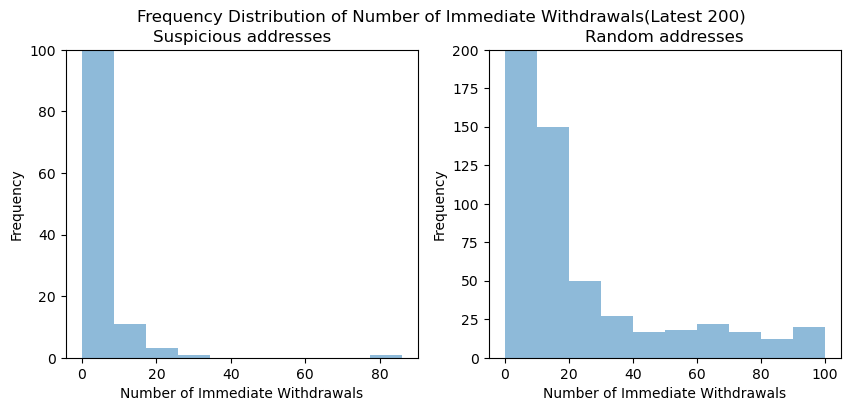

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

values = list(immediate_withdraw_counts.values())
values_random = list(immediate_withdraw_counts_random.values())

#Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10,4))

# Plot the histogram 1
axs[0].hist(values, alpha=0.5)
# sns.kdeplot(values)
axs[0].set_xlabel('Number of Immediate Withdrawals')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Suspicious addresses')
axs[0].set_ylim(0, 100)

# Plot the histogram 2
axs[1].hist(values_random, bins = 10, alpha=0.5)
# sns.kdeplot(values)
axs[1].set_xlabel('Number of Immediate Withdrawals')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Random addresses')
axs[1].set_ylim(0, 200)

plt.suptitle('Frequency Distribution of Number of Immediate Withdrawals(Latest 200)')

# Display the plot
plt.show()

In [80]:
def convert_to_ratio(immediate_withdraw_counts, sizes):
    # print(list(immediate_withdraw_counts.values()))
    for c in list(immediate_withdraw_counts.values()):
        # print(c)
        if c == 0:
            sizes[0] += 1
        elif c <= 10:
            sizes[1] += 1
        elif c <= 20:
            sizes[2] += 1
        elif c <= 30:
            sizes[3] += 1
        elif c <= 40:
            sizes[4] += 1
        else:
            sizes[5] += 1
    return sizes

In [120]:
labels = ['0','1~10', '11~20','21~30', '31~40', '>=41']
sizes_sus = [0, 0, 0, 0, 0, 0]
sizes_rand = [0, 0, 0, 0, 0, 0]
sizes_sus = convert_to_ratio(immediate_withdraw_counts, sizes_sus)
sizes_rand = convert_to_ratio(immediate_withdraw_counts_random, sizes_rand)
print(sizes_sus, sizes_rand)

[76, 68, 10, 3, 1, 1] [1932, 815, 132, 43, 24, 94]


In [114]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pie(sizes):
    x = np.char.array(['0','1~10', '11~20','21~30', '31~40', '>=41'])
    y = np.array(sizes)
    colors = ['red', 'yellowgreen','gold','lightskyblue','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    percent = 100.*y/y.sum()

    patches, texts = plt.pie(y, colors = colors, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

    sort_legend = False
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                            key=lambda x: x[2],
                                            reverse=True))

    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=8)
    plt.title('Frequency Distribution of Number of Immediate Withdrawals')


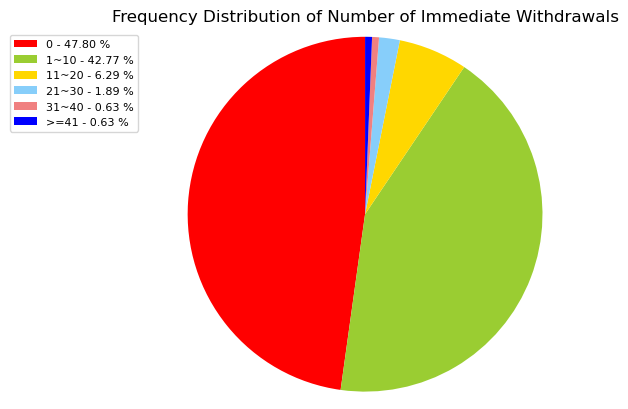

In [119]:
plot_pie(sizes_sus)

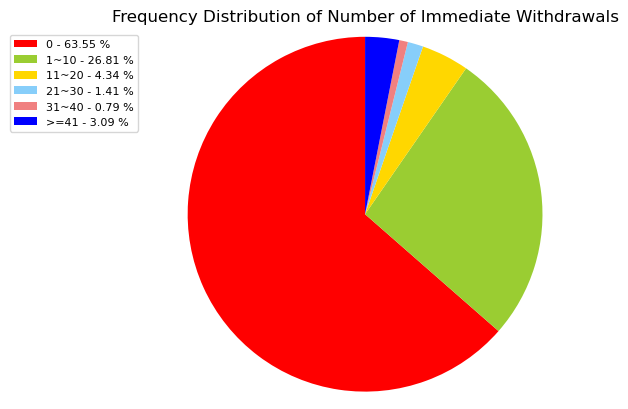

In [121]:
plot_pie(sizes_rand)

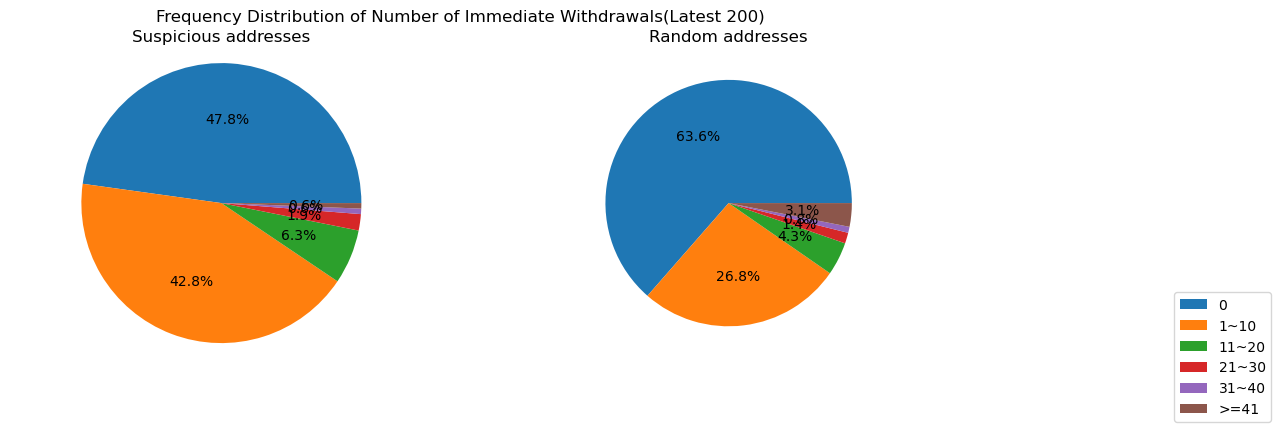

In [122]:
import matplotlib.pyplot as plt

#Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Plot the histogram 1
axs[0].pie(sizes_sus, autopct='%1.1f%%')
axs[0].axis('equal')
# sns.kdeplot(values)
axs[0].set_title('Suspicious addresses')
# axs[0].set_ylim(0, 100)
axs[0].legend(labels, loc='right', bbox_to_anchor=(3, 0))

# Plot the histogram 2
axs[1].pie(sizes_rand, autopct='%1.1f%%')
# sns.kdeplot(values)
axs[1].set_title('Random addresses')
# axs[1].legend(labels, loc='lower right', bbox_to_anchor=(0, 0))

plt.suptitle('Frequency Distribution of Number of Immediate Withdrawals(Latest 200)')


# Display the plot
plt.show()

### Rule 4: Money loss movement

In [ ]:
def money_loss_movements(address, money_loss_movements_counts):
    print(address)
    response = requests.get('https://api.trongrid.io/v1/accounts/'+address+'/transactions/trc20?&contract_address=TR7NHqjeKQxGTCi8q8ZY4pL8otSzgjLj6t&limit=200&offset=0')
    if response.status_code != 200:
        return
    transactions = response.json()['data']
    count = 0
    consecutive_count = 0
    for t in transactions:
        if 'value' in t:
            if float(t['value']) < 900000:
                consecutive_count += 1 
                # last_tx_value = float(t['value'])
                # last_tx_time = tx_index
            else:
                if consecutive_count >= 3:
                    count += 1
                    consecutive_count = 0
                else:
                    consecutive_count = 0
    
    print(count)
    money_loss_movements_counts[address] = count

In [ ]:
money_loss_movements_counts = {}
for address in addresses['address']:
    money_loss_movements(address, money_loss_movements_counts)
    
print(money_loss_movements_counts)

In [ ]:
money_loss_movements_counts_random = {}
for address in rand_addresses['Address']:
    money_loss_movements(address, money_loss_movements_counts_random)
    
print(money_loss_movements_counts_random)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

values = list(money_loss_movements_counts.values())
values_random = list(money_loss_movements_counts_random.values())

#Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10,4))

# Plot the histogram 1
axs[0].hist(values, alpha=0.5)
# sns.kdeplot(values)
axs[0].set_xlabel('Number of Serialized Transactions Causing Money Loss')
axs[0].set_ylabel('Count')
axs[0].set_title('Suspicious addresses')
# axs[0].set_ylim(0, 100)

# Plot the histogram 2
axs[1].hist(values_random, bins = 10, alpha=0.5)
# sns.kdeplot(values)
axs[1].set_xlabel('Number of Serialized Transactions Causing Money Loss')
axs[1].set_ylabel('Count')
axs[1].set_title('Random addresses')
# axs[1].set_ylim(0, 200)

plt.suptitle('Count Distribution of Number of Serialized Transactions Causing Money Loss')

# Display the plot
plt.show()